
# Detecção de Fraudes em Transações Financeiras

Este projeto tem como objetivo desenvolver um algoritmo para a detecção de fraudes em uma base de transações financeiras utilizando técnicas de machine learning e análise de anomalias. O foco será identificar transações suspeitas ou fraudulentas em um grande conjunto de dados de transações.


### Importando as bibliotecas


In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_auc_score
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt


### Coleta dos dados

Como fonte de dados será utilizado o dataset [Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023?resource=download) que esta disponível no Kaggle.

Será utilizado a biblioteca `pandas` para carregar os dados em um dataframe.


In [3]:
# Carregar o dataset
file_path = 'dataset/creditcard_2023.csv'
df = pd.read_csv(file_path, sep=',')


### Análise Exploratória (EDA)

- `shape`: Exibe a quantidade de linas e colunas do dataset.
- `info()`: Mostra informações como o número de entradas, número de colunas, nomes das colunas, e tipos de dados.
- `describe()`: Fornece estatísticas descritivas como média, desvio padrão, valores mínimos e máximos para as variáveis numéricas.
- `head()`: Retorna as primeiro 5 linhas do dataset.
- `tail()`: Retorna as últimas 5 linhas do dataset.
- `value_counts()`: Exibe a contagem de cada classe na variável alvo Class, onde 0 representa transações legítimas e 1 transações fraudulentas.


In [4]:
# Exibindo quantidade de linhas e colunas.
df.shape

(568630, 31)

In [5]:
# Exibindo informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
# Informações quantitativas do dataset
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [7]:
# Visualizando as primeiras linhas do dataset
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
# Visualozando as ultimas linhas do dataset
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [9]:
# Verificar o número de transações fraudulentas e não fraudulentas
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64


### Análise da qualidade e limpeza dos dados

Nessa etapa serão verificados e tratados os valores ausentes, duplicados e outliers.


### Tratamento de dados duplicados


In [10]:
# Exibindo os primeiros registros dos dados duplicados no dataset - Não temos
df[df.duplicated()].head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class



### Tratamento de dados ausentes


In [11]:
# Verifica se existem dados ausentes - Não temos
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Balanceamento de dados


In [4]:
# Pegando dados de análise e removendo coluna que indica o resultado a ser buscado. 
X_dados = df.drop('Class', axis=1)
X_dados

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [5]:
# Separando coluna com resultado esperado para comparação a análise do algoritmo.
y_dados = df['Class']
y_dados

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [6]:
# Define numeric features (remove categorical columns)
numeric_features = X_dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', CatBoostClassifier(verbose=False))])

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=42)

In [8]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'V1', 'V2', 'V3', 'V4',
                                                   'V5', 'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001B98D024830>)])

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9996570705027874



### Implementação de medidas de Redução de Falsos Positivos

In [11]:
# Probabilidade para a classe 1 (fraude)
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Ajustar o limiar de decisão para reduzir falsos positivos
threshold = 0.7  # Aumentando o threshold para ser mais conservador
y_pred_adjusted = (y_pred_probs >= threshold).astype(int)

In [12]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("Accuracy com limiar ajustado:", accuracy)
print("AUC-ROC Score:", roc_auc)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_adjusted))

Accuracy com limiar ajustado: 0.9996570705027874
AUC-ROC Score: 0.9999701192680868
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [13]:
# Curva Precision-Recall para analisar o trade-off
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)

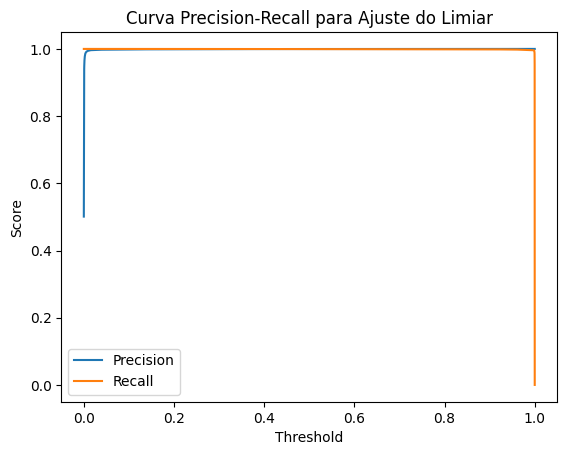

In [14]:
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Curva Precision-Recall para Ajuste do Limiar")
plt.legend()
plt.show()


### Criando Dataset para análise no Power BI


In [16]:
# Criando um DataFrame com as transações originais, previsões e probabilidades
df_results = X_test.copy()

# Adicionando a classe verdadeira
df_results['Classe Real'] = y_test.values

# Adicionando as previsões do modelo
df_results['Previsão'] = y_pred

# Adicionando a probabilidade prevista da classe positiva (fraude)
df_results['Probabilidade de Fraude'] = y_pred_probs

# Verificando o DataFrame gerado
df_results.head()



,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Classe Real,Previsão,Probabilidade de Fraude
437378,437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,...,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1,1,0.999999
504222,504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,...,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1,1,0.999999
4794,4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,...,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0,0,0.000327
388411,388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,...,0.446262,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98,1,1,1.000000
424512,424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,...,-0.181999,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27,1,1,0.999995


In [17]:
# Definindo um limiar customizado
limiar_customizado = 0.7

# Recalculando as previsões com o limiar customizado
df_results['Previsão Ajustada'] = (df_results['Probabilidade de Fraude'] >= limiar_customizado).astype(int)

# Verificando o DataFrame atualizado com o limiar ajustado
df_results.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Classe Real,Previsão,Probabilidade de Fraude,Previsão Ajustada
437378,437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,...,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1,1,0.999999,1
504222,504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,...,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1,1,0.999999,1
4794,4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,...,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0,0,0.000327,0
388411,388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,...,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98,1,1,1.000000,1
424512,424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,...,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27,1,1,0.999995,1


In [18]:
# Salvando o DataFrame com os resultados em um arquivo CSV
df_results.to_csv('dataset/resultados_previsoes_fraude.csv', index=False)